# Project-level Analysis

In [111]:
x=list()
classes=c("character","integer","integer","integer","integer","integer","integer","integer","integer",
          "integer","integer","numeric","numeric","integer","character","integer","integer","integer",
          "integer","numeric","numeric","numeric","numeric")
for(i in 0:2){
    path=paste("../data/projects/sample.P2all.",i,"y",sep="")
    x[[i+1]]=read.table(path,sep=";",colClasses=classes,na.strings=c("null"))
}
names(x)=c("All","1y","2y")

In [112]:
for(i in 1:3) {
    names(x[[i]])=c("p","ncmt","nblob","na","ncore","nmc","nf","cs","nfr","gm","gf","et","lt","ns",
                    "l","nb","cc","bc","bcc","ad","as","acs","ebt")
    x[[i]]$c=x[[i]]$cc>0
    x[[i]]$cr=x[[i]]$cc/x[[i]]$nb
    x[[i]]$br=x[[i]]$bc/x[[i]]$nb
    x[[i]]$bcr=x[[i]]$bcc/x[[i]]$cc
    x[[i]][is.na(x[[i]]$na),"na"]=1
    x[[i]][is.na(x[[i]]$ncore),"ncore"]=1
    x[[i]][is.na(x[[i]]$cs),"cs"]=1
    x[[i]][is.na(x[[i]]$ns),"ns"]=0
    x[[i]][is.na(x[[i]]$gm),"gm"]=0
    x[[i]][is.na(x[[i]]$gf),"gf"]=0
}

In [113]:
tmp=list()
for(i in 1:3) {
    tmp[[i]]=names(table(x[[i]]$l)[table(x[[i]]$l)>1000])
}
tmp2=intersect(intersect(tmp[[1]],tmp[[2]]),tmp[[3]])
for(i in 1:3) {
    x[[i]]$ll=as.factor(ifelse(((x[[i]]$l %in% tmp2) & (x[[i]]$l != "null") & (x[[i]]$l != "Unknown")),
                     as.character(x[[i]]$l), "Other"))
}
ty=names(table(x[[i]]$ll))

## Variables

**From MongoDB:**  

- p: Project  
- ncmt: NumCommits  
- nblob: NumBlobs  
- na: NumAuthors  
- ncore: NumCore  
- nmc: NumActiveMon  
- nf: NumFiles  
- cs: CommunitySize  
- nfr: NumForks  
- gm: Gender.male  
- gf: Gender.female  
- et: EarliestCommitDate  
- lt: LatestCommitDate  
- ns: Number of stars  

**Calculated in copy timeframe(1y/2y):**

- l: Most common original blob language  
- nb: Original blobs count  
- cc: Copied blobs count  
- bc: Original binary blobs count  
- bcc: Copied binary blobs count  
- ad: Average downstream projects count  
- as: Average original blob size (excluding binary blobs)  
- acs: Average copied blob size (excluding binary blobs)  
- ebt: Earliest original blob time  
- c: Whether project has copied blobs
- cr: Copied to original blobs ratio (cc/nb)
- br: Binary to original blobs ratio (bc/nb)
- bcr: Binary to copied blobs ratio (bcc/cc)

In [114]:
for(i in 1:3) {
    print(names(x)[i])
    print(summary(x[[i]]))
}

[1] "All"
      p                  ncmt             nblob               na          
 Length:921103      Min.   :      1   Min.   :      1   Min.   :    1.00  
 Class :character   1st Qu.:      2   1st Qu.:      6   1st Qu.:    1.00  
 Mode  :character   Median :      4   Median :     24   Median :    1.00  
                    Mean   :     46   Mean   :    396   Mean   :    2.14  
                    3rd Qu.:     12   3rd Qu.:     85   3rd Qu.:    1.00  
                    Max.   :6129261   Max.   :5332329   Max.   :40930.00  
                                                                          
     ncore                nmc                nf                cs          
 Min.   :    1.000   Min.   :  0.000   Min.   :      1   Min.   :    1.00  
 1st Qu.:    1.000   1st Qu.:  1.000   1st Qu.:      4   1st Qu.:    1.00  
 Median :    1.000   Median :  1.000   Median :     17   Median :    1.00  
 Mean   :    1.493   Mean   :  2.209   Mean   :    430   Mean   :    2.04  
 3rd Qu.: 

### 1. What fraction of projects have copied blobs?

In [128]:
for(i in 1:3) {
    print(c(names(x)[i],sum(x[[i]]$c)/dim(x[[i]])[1]))
}

[1] "All"               "0.318064320711147"
[1] "1y"               "0.29248618905248"
[1] "2y"                "0.331250120216197"


### 2. Does propensity to copy vary by language?

In [129]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(c ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   8613   430.7    2192 <2e-16 ***
Residuals   823782 161863     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   7224   361.2    1720 <2e-16 ***
Residuals   623855 130979     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 2.1. Which languages are different?

In [130]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"c"],x[[i]][x[[i]]$ll!=l,"c"])
        if(test$p.value<sv){
            mean=sum(x[[i]][x[[i]]$ll==l,"c"])/dim(x[[i]][x[[i]]$ll==l,])[1]
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
        
    }
}

[1] "1y"
[1] "C"                "Not significant!"
[1] "CSS"              "Not significant!"
[1] "Cs"                "0.328900893413671" "t: 10.890260"     
[1] "Fml"              "Not significant!"
[1] "Go"               "0.27093044937535" "t: -3.562573"    
[1] "JS"                "0.377832809267013" "t: 67.601365"     
[1] "Kotlin"            "0.401104590956162" "t: 11.950055"     
[1] "Markdown"           "0.0952107279693487" "t: -241.466084"    
[1] "ObjectiveC"        "0.344150298889838" "t: 7.464773"      
[1] "Other"             "0.315091042372992" "t: 34.346658"     
[1] "PY"                "0.266118968386023" "t: -13.457126"    
[1] "R"                 "0.239524195728575" "t: -7.560922"     
[1] "Rust"             "Not significant!"
[1] "Scala"            "Not significant!"
[1] "Sql"               "0.180645161290323" "t: -11.447856"    
[1] "Swift"             "0.329626837542405" "t: 5.774514"      
[1] "TypeScript"        "0.558807245115874" "t: 60.853619"     
[1] "ipy"    

In [132]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~ll, data=x[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ ll, family = binomial, data = x[[i]])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.279  -0.870  -0.795   1.395   2.169  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.907559   0.013455 -67.453  < 2e-16 ***
llCSS         0.005278   0.023422   0.225   0.8217    
llCs          0.194399   0.020405   9.527  < 2e-16 ***
llFml        -0.043600   0.062511  -0.697   0.4855    
llGo         -0.082348   0.033541  -2.455   0.0141 *  
llJS          0.408802   0.014686  27.836  < 2e-16 ***
llKotlin      0.506695   0.040224  12.597  < 2e-16 ***
llMarkdown   -1.344050   0.016326 -82.326  < 2e-16 ***
llObjectiveC  0.262706   0.033569   7.826 5.04e-15 ***
llOther       0.131135   0.014007   9.362  < 2e-16 ***
llPY         -0.106844   0.016957  -6.301 2.96e-10 ***
llR          -0.247731   0.040807  -6.071 1.27e-09 ***
llRust       -0.031104   0.057692  -0.539   0.5898    
llScala       0.104928   0.064579   1.6

### 3. Does copied blobs ratio differ by language?

In [131]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(cr ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20    118   5.878   230.9 <2e-16 ***
Residuals   823782  20976   0.025                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20     67   3.337   118.2 <2e-16 ***
Residuals   623855  17617   0.028                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 3.1. Which languages are different?

In [95]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"cr"],x[[i]][x[[i]]$ll!=l,"cr"])
        mean=sum(x[[i]][x[[i]]$ll==l,"cr"])/dim(x[[i]][x[[i]]$ll==l,])[1]
        if(test$p.value<sv){
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
        
    }
}

[1] "1y"
[1] "C"                  "0.0475476824605886" "t: -5.551353"      
[1] "CSS"                "0.0921227178178812" "t: 20.776418"      
[1] "Cs"                 "0.0382532416793308" "t: -15.300434"     
[1] "Fml"                "0.0279408929657483" "t: -9.117918"      
[1] "Go"                 "0.0319223838275184" "t: -13.865550"     
[1] "JS"                 "0.0591816083569628" "t: 15.653530"      
[1] "Kotlin"             "0.0326132542228359" "t: -9.667560"      
[1] "Markdown"           "0.0355479757078189" "t: -44.380049"     
[1] "ObjectiveC"       "Not significant!"
[1] "Other"              "0.0602309595602385" "t: 32.473162"      
[1] "PY"                 "0.0395865796998143" "t: -21.691335"     
[1] "R"                "Not significant!"
[1] "Rust"               "0.0256685951046183" "t: -11.053320"     
[1] "Scala"              "0.0231188542701682" "t: -12.905444"     
[1] "Sql"              "Not significant!"
[1] "Swift"              "0.0350248864164799" "t: -11.589841"

In [133]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(cr~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = cr ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09212 -0.06023 -0.04449 -0.03555  0.97688 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0475477  0.0009717  48.932  < 2e-16 ***
llCSS         0.0445750  0.0016929  26.331  < 2e-16 ***
llCs         -0.0092944  0.0015056  -6.173 6.69e-10 ***
llFml        -0.0196068  0.0044741  -4.382 1.17e-05 ***
llGo         -0.0156253  0.0023858  -6.549 5.78e-11 ***
llJS          0.0116339  0.0010731  10.841  < 2e-16 ***
llKotlin     -0.0149344  0.0031199  -4.787 1.69e-06 ***
llMarkdown   -0.0119997  0.0010639 -11.279  < 2e-16 ***
llObjectiveC -0.0003544  0.0025259  -0.140  0.88841    
llOther       0.0126833  0.0010137  12.512  < 2e-16 ***
llPY         -0.0079611  0.0012140  -6.558 5.47e-11 ***
llR           0.0005499  0.0027978   0.197  0.84418    
llRust       -0.0218791  0.0041403  -5.284 1.26e-07 ***
llScala      -0.0244288  0.0047594  -5.133 2

### 4. Are binary blobs being copied more?

In [89]:
for(i in 2:3) {
    print(names(x)[i])
    print(t.test(x[[i]]$bcr,x[[i]]$br))
}

[1] "1y"

	Welch Two Sample t-test

data:  x[[i]]$bcr and x[[i]]$br
t = 99.91, df = 308790, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07799839 0.08111986
sample estimates:
mean of x mean of y 
0.2142382 0.1346790 

[1] "2y"

	Welch Two Sample t-test

data:  x[[i]]$bcr and x[[i]]$br
t = 84.408, df = 277783, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07109495 0.07447513
sample estimates:
mean of x mean of y 
0.2134628 0.1406778 



#### 4.1. Is this the case for all languages?

In [135]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"bcr"],x[[i]][x[[i]]$ll==l,"br"])
        if(test$p.value<sv){
            print(c(l,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"            "t: 12.240485"
[1] "CSS"          "t: 41.728614"
[1] "Cs"           "t: 20.763692"
[1] "Fml"              "Not significant!"
[1] "Go"          "t: 4.723659"
[1] "JS"           "t: 57.766399"
[1] "Kotlin"      "t: 7.205821"
[1] "Markdown"     "t: 43.863896"
[1] "ObjectiveC"  "t: 8.399160"
[1] "Other"        "t: 47.870694"
[1] "PY"          "t: 4.501166"
[1] "R"           "t: 7.086049"
[1] "Rust"        "t: 4.995747"
[1] "Scala"            "Not significant!"
[1] "Sql"         "t: 3.749041"
[1] "Swift"       "t: 9.941702"
[1] "TypeScript"   "t: 13.637154"
[1] "ipy"          "t: 13.373675"
[1] "java"         "t: 24.860358"
[1] "php"          "t: 36.975464"
[1] "rb"           "t: 11.078179"
[1] "2y"
[1] "C"            "t: 11.567158"
[1] "CSS"          "t: 33.551087"
[1] "Cs"           "t: 20.197662"
[1] "Fml"              "Not significant!"
[1] "Go"          "t: 3.797992"
[1] "JS"           "t: 51.595341"
[1] "Kotlin"      "t: 5.974082"
[1] "Markdown"     "t: 37.

### 4. Does binary blob copy ratio differ by language?

In [418]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(bcr ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   1587   79.33   619.6 <2e-16 ***
Residuals   240930  30847    0.13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
582852 observations deleted due to missingness
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   1195   59.75   473.6 <2e-16 ***
Residuals   206638  26073    0.13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
417217 observations deleted due to missingness


#### 4.1. Which languages are different?

In [422]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){
        t1=x[[i]][x[[i]]$ll==l,"bcr"]
        test=t.test(t1,x[[i]][x[[i]]$ll!=l,"bcr"])
        if(test$p.value<sv){
            mean=sum(t1,na.rm=TRUE)/(dim(x[[i]][x[[i]]$ll==l,])[1]-sum(is.na(t1)))
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
        
    }
}

[1] "1y"
[1] "C"                "0.15647883200667" "t: -16.313175"   
[1] "CSS"              "0.53439930042172" "t: 44.427040"    
[1] "Cs"               "Not significant!"
[1] "Fml"                "0.0772577394365586" "t: -11.139169"     
[1] "Go"                 "0.0622853212577221" "t: -26.675567"     
[1] "JS"                "0.136183458586808" "t: -58.277499"    
[1] "Kotlin"            "0.128782874556374" "t: -9.936099"     
[1] "Markdown"          "0.230244243600899" "t: 4.763339"      
[1] "ObjectiveC"       "Not significant!"
[1] "Other"             "0.282266697604368" "t: 72.411801"     
[1] "PY"                "0.151788983656584" "t: -22.695511"    
[1] "R"                "Not significant!"
[1] "Rust"              "0.101166936395622" "t: -8.758388"     
[1] "Scala"              "0.0841104720143495" "t: -9.856246"      
[1] "Sql"              "Not significant!"
[1] "Swift"            "Not significant!"
[1] "TypeScript"         "0.0624840032112579" "t: -61.309956"     
[1] "ip

In [423]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(bcr~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = bcr ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53440 -0.23514 -0.13618  0.09067  0.93771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.156479   0.004064  38.506  < 2e-16 ***
llCSS         0.377920   0.007071  53.449  < 2e-16 ***
llCs          0.046174   0.006061   7.618 2.58e-14 ***
llFml        -0.079221   0.018992  -4.171 3.03e-05 ***
llGo         -0.094194   0.010229  -9.209  < 2e-16 ***
llJS         -0.020295   0.004390  -4.623 3.79e-06 ***
llKotlin     -0.027696   0.011256  -2.461 0.013873 *  
llMarkdown    0.073765   0.005140  14.351  < 2e-16 ***
llObjectiveC  0.078659   0.009795   8.031 9.73e-16 ***
llOther       0.125788   0.004224  29.778  < 2e-16 ***
llPY         -0.004690   0.005150  -0.911 0.362461    
llR           0.037889   0.012689   2.986 0.002828 ** 
llRust       -0.055312   0.017498  -3.161 0.001572 ** 
llScala      -0.072368   0.019215  -3.766 0.000166 ***
ll

### 5. Does binary blob copy ratio differ by language? (Normalized with binary blob ratio)

In [393]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(bcr/br ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df    Sum Sq Mean Sq F value   Pr(>F)    
ll              20    274697   13735   5.464 2.68e-14 ***
Residuals   144310 362720422    2513                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
679472 observations deleted due to missingness
[1] "2y"
                Df    Sum Sq Mean Sq F value Pr(>F)    
ll              20    234371   11719    7.99 <2e-16 ***
Residuals   124779 183004790    1467                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
499076 observations deleted due to missingness


#### 5.1. Which languages are different?

In [417]:
for(i in 2:3){
    tmp=x[[i]]$bcr/x[[i]]$br
    s=sum(tmp,na.rm=TRUE)/(dim(x[[i]])[1]-sum(is.na(tmp)))
    print(c(names(x)[i],s))
}

[1] "1y"               "4.30255631374552"
[1] "2y"               "4.06794982518847"


In [407]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){
        t1=x[[i]][x[[i]]$ll==l,"bcr"]/x[[i]][x[[i]]$ll==l,"br"]
        t2=x[[i]][x[[i]]$ll!=l,"bcr"]/x[[i]][x[[i]]$ll!=l,"br"]
        test=t.test(t1,t2)
        mean=sum(t1,na.rm=TRUE)/(dim(x[[i]][x[[i]]$ll==l,])[1]-sum(is.na(t1)))
        if(test$p.value<sv){
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
        
    }
}

[1] "1y"
[1] "C"                "3.51577304002397" "t: -3.077859"    
[1] "CSS"             "2.6647172866179" "t: -10.233802"  
[1] "Cs"               "Not significant!"
[1] "Fml"              "Not significant!"
[1] "Go"               "Not significant!"
[1] "JS"               "7.15271065794206" "t: 8.297537"     
[1] "Kotlin"           "Not significant!"
[1] "Markdown"         "2.70426194969704" "t: -8.599626"    
[1] "ObjectiveC"       "2.23015089394896" "t: -10.230360"   
[1] "Other"            "Not significant!"
[1] "PY"               "2.22034711979757" "t: -11.494938"   
[1] "R"               "2.8323563612391" "t: -4.335868"   
[1] "Rust"             "Not significant!"
[1] "Scala"            "Not significant!"
[1] "Sql"              "2.19184818242328" "t: -4.062038"    
[1] "Swift"            "2.56147651927627" "t: -6.306034"    
[1] "TypeScript"       "5.85837707191259" "t: 3.592371"     
[1] "ipy"              "2.01080695185325" "t: -11.612447"   
[1] "java"             "Not sign

In [400]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(bcr/br~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = bcr/br ~ ll, data = x[[i]])

Residuals:
   Min     1Q Median     3Q    Max 
  -7.2   -3.9   -2.9   -1.5 9904.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.51577    0.69820   5.035 4.77e-07 ***
llCSS        -0.85106    1.16746  -0.729   0.4660    
llCs          1.35830    1.04004   1.306   0.1916    
llFml         0.63292    4.01238   0.158   0.8747    
llGo          1.63014    2.14977   0.758   0.4483    
llJS          3.63694    0.77945   4.666 3.07e-06 ***
llKotlin      2.67132    2.09678   1.274   0.2027    
llMarkdown   -0.81151    0.95491  -0.850   0.3954    
llObjectiveC -1.28562    1.56659  -0.821   0.4118    
llOther       0.39997    0.72487   0.552   0.5811    
llPY         -1.29543    0.89225  -1.452   0.1465    
llR          -0.68342    2.12194  -0.322   0.7474    
llRust        2.76195    3.77125   0.732   0.4639    
llScala       2.66773    4.23583   0.630   0.5288    
llSql        -1.32392    3.79132  

In [ ]:
ts=list()
for(i in 2:3){
    ts[[i]]=list()
    for(j in 1:dim(tx[[i]])[1]){
        posix=as.POSIXct(tx[[i]]$t[j], origin="1970-01-01")
        period=substr(posix,1,7)
        c=tx[[i]]$c[j]
        if(is.null(ts[[i]][[period]])){
            ts[[i]][[period]]["total"]=1
            ts[[i]][[period]]["copied"]=c
        }else{
            ts[[i]][[period]]["total"]=ts[[i]][[period]]["total"]+1
            ts[[i]][[period]]["copied"]=ts[[i]][[period]]["copied"]+c
        }
    }
}

In [136]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    lm=lm(bcr~br+ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = bcr ~ br + ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03601 -0.11384 -0.08371  0.02967  0.99825 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.048772   0.003527  13.829  < 2e-16 ***
br            0.756868   0.002633 287.429  < 2e-16 ***
llCSS         0.234295   0.006122  38.271  < 2e-16 ***
llCs          0.051273   0.005230   9.803  < 2e-16 ***
llFml        -0.021294   0.016390  -1.299 0.193866    
llGo         -0.021367   0.008830  -2.420 0.015533 *  
llJS          0.034940   0.003793   9.211  < 2e-16 ***
llKotlin      0.021233   0.009715   2.186 0.028844 *  
llMarkdown    0.050049   0.004436  11.281  < 2e-16 ***
llObjectiveC  0.052567   0.008453   6.219 5.01e-10 ***
llOther       0.055696   0.003653  15.245  < 2e-16 ***
llPY         -0.049670   0.004447 -11.170  < 2e-16 ***
llR           0.038716   0.010950   3.536 0.000407 ***
llRust        0.011992   0.015101   0.794 0.427130  

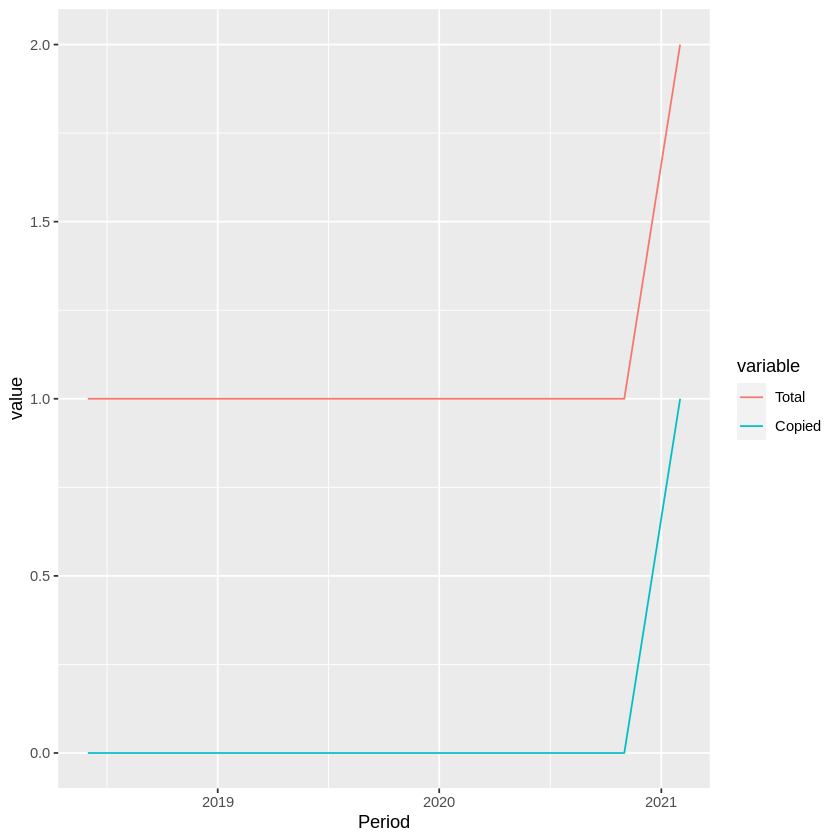

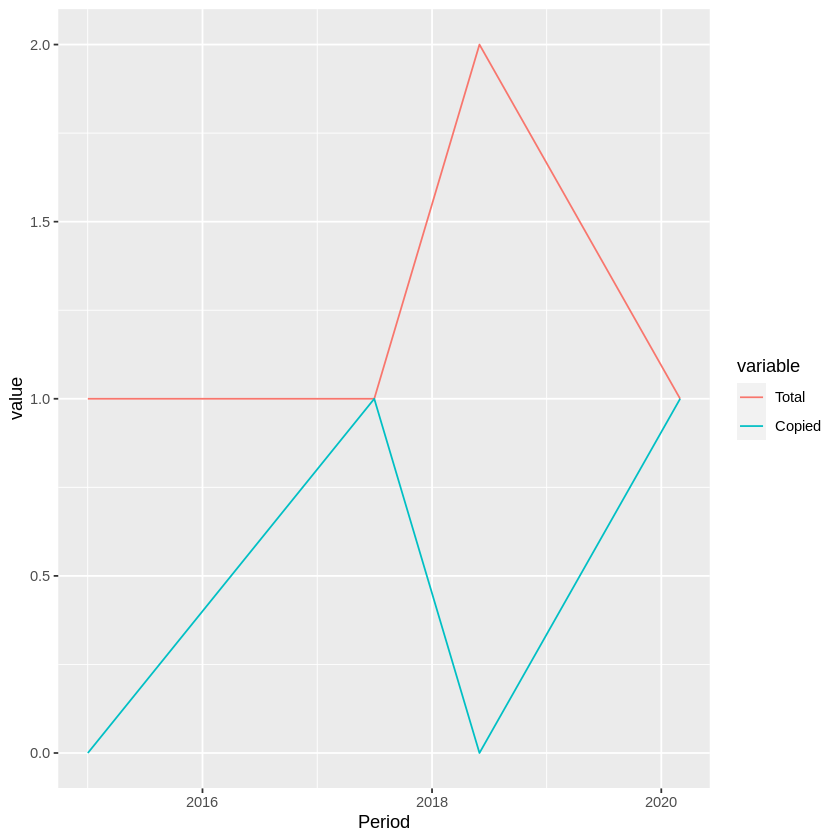

In [382]:
df=list()
for(i in 2:3){
    df[[i]]=data.frame(matrix(ncol=3, nrow=0))
    colnames(df[[i]])=c("Period","Total","Copied")
    j=1
    for(p in sort(names(res[[i]]))){
        row=res[[i]][[p]]
        df[[i]][j,]=c(p,row["total"],row["copied"])
        j=j+1
    }
    df[[i]][,"Period"]=as.Date(paste(df[[i]][,"Period"],"-01",sep=""))
    df[[i]][,"Total"]=as.integer(df[[i]][,"Total"])
    df[[i]][,"Copied"]=as.integer(df[[i]][,"Copied"])
    Molten <- melt(df[[i]], id.vars = "Period")
    print(ggplot(Molten, aes(x = Period, y = value, colour = variable)) + geom_line())
}